<center>
<h1>EJERICIO 2.</h1>
</center>


Utilice el metodo de interpolación de Lagrange para encontrar un polinomio que se ajuste a la funcion. Para esto se concidera la expresión para la interpolación de lagrange:
 
$$ f(x) = y_j(x_i) = \sum_{j=0}^{n} \alpha_j u_j(x_i) $$

Con este método de busca el polinmio de orden $n$ que pase por un conjunto de $n+1$ puntos, considerando que 

$$y_j(x_i) = \begin{cases}1, & \text{si } i = j \\0, & \text{si } i \neq j\end{cases}$$

Para la solución de este problema se define la siguiente función:

In [15]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot

Esta función está basada en la función ***lagrange*** creada por **© Daniel Giraldo Cuartas 2022**:

In [16]:
def lagrange(xi, yi):
    n  = len(xi)                                                # Numero de iteraciones
    x  = sym.Symbol('x')
    ui = sym.ones(n, 1)                                         # Arreglo de polinomios 
    b = sym.zeros(n, 1)                                         # Funcion a aproximar
    
    for i in range(n):
        b[i] = yi[i]
        for j in range(n):
            if i!=j:
                ui[i] *= (x-xi[j])/(xi[i] - xi[j])              # Cuando i es diferente de j debe dar cero 
    
    polinomio = 0
    for i in range(n):
        polinomio += b[i]*ui[i,0]   
        
    return ui, polinomio

La funcion aproximada es: 0.5*x*(0.25 - 0.75*x)*(0.4 - 0.6*x)*(0.5 - 0.5*x)*(-3.0*x - 2.0)*(-1.5*x - 0.5) - 0.625000000000003*x*(0.333333333333333 - 1.0*x)*(0.5 - 0.75*x)*(0.6 - 0.6*x)*(-3.0*x - 1.0)*(3.0*x + 3.0) - 1.75*x*(0.5 - 1.5*x)*(0.666666666666667 - 1.0*x)*(0.75 - 0.75*x)*(1.5*x + 1.5)*(3.0*x + 2.0) + 2.75*x*(1.5 - 1.5*x)*(2.0 - 3.0*x)*(0.75*x + 0.75)*(1.0*x + 0.666666666666667)*(1.5*x + 0.5) + 1.625*x*(3.0 - 3.0*x)*(0.6*x + 0.6)*(0.75*x + 0.5)*(1.0*x + 0.333333333333333)*(3.0*x - 1.0) + 0.5*x*(0.5*x + 0.5)*(0.6*x + 0.4)*(0.75*x + 0.25)*(1.5*x - 0.5)*(3.0*x - 2.0)


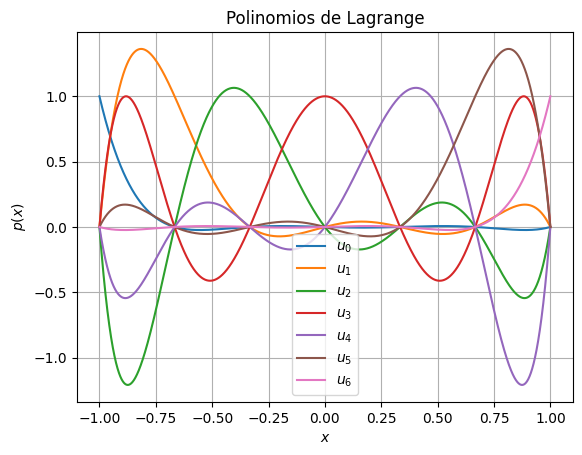

In [22]:
x = sym.Symbol('x')    
n = 7                                                           # Polinomio de orden n requiere n+1 puntos (poli 5 pun 6)
funcion = ((sym.sin(np.pi*x))**2)+(x/2)                         # Funcion a aproximar
lim = [-1,1]

Xi = np.linspace(lim[0],lim[1], n)                              # Intervalo de interpolacion dividido en n+1 puntos (6)
Fi = sym.lambdify(x, funcion)(Xi)

ui, fl = lagrange(Xi, Fi)

print(f"La funcion aproximada es: {fl}")                         #Polinomio lagrange

# GRAFICA DE POLINOMIOS INTERPOLANTES
x2  = np.linspace(lim[0],lim[1], 10000)
y2 = sym.lambdify(x, funcion)(x2) 
plt.figure()
for i,u in enumerate(ui):
    px = sym.lambdify(x, u)(x2)
    plt.plot(x2,px, label=f"$u_{i}$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.title(f"Polinomios de Lagrange")
plt.legend()


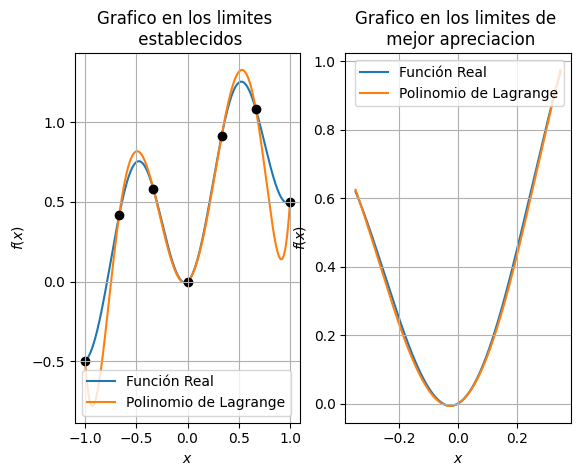

In [23]:
yl= sym.lambdify(x, fl)(x2)                                             # Polinomio de lagrange evaluada en el mismo rango de la funcion original

xb = np.linspace(-0.35, 0.35, 10000)                                    # Limites en los que se ve una mejor aproximacion
y2b = sym.lambdify(x, funcion)(xb)                                      # Funcion real evualauda en los nuevos limites
ylb= sym.lambdify(x, fl)(xb)                                            # Polinomio de lagrange evaluada en los nuevos limites


# GRAFICO 
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x2,y2, zorder=0, label="Función Real")
ax1.plot(x2,yl, zorder=1, label="Polinomio de Lagrange")
ax1.set_title("Grafico en los limites \n establecidos")

ax1.scatter(Xi, Fi, c='k')
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

#-------------------------------------------------------------------

ax2.plot(xb,y2b, zorder=0, label="Función Real")
ax2.plot(xb,ylb, zorder=1, label="Polinomio de Lagrange")
ax2.set_title("Grafico en los limites de \n mejor apreciacion")

ax2.grid()
ax2.set_xlabel("$x$")
ax2.set_ylabel("$f(x)$")
ax2.legend()